In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [5]:
warnings.filterwarnings('ignore')
train_df=pd.read_csv('Train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
print('Sample view of training data:\n',train_df.head())
print('Sample view of testing data:\n',test_df.sample(5))
print('Total no of rows and columns in train data are:',train_df.shape)
print('Total no of rows and columns in train data are:',test_df.shape)

Sample view of training data:
         Col1  Col2          Col3          Col4          Col5          Col6  \
0    RIGHGSN     1  1.086711e+04  8.648345e+03  1.576618e+04  2.890466e+04   
1  RIMHI5ZGP     0  2.584312e+05  2.179633e+05  1.866287e+05  1.866287e+05   
2  RIHOG1SZU     0  1.459355e+07  1.260060e+07  1.100315e+07  1.010315e+07   
3  RIHOLMQWU     0  6.727043e+05  8.181116e+05  6.794893e+05  6.794893e+05   
4  RIHO584ET     0 -1.218742e+06 -3.005361e+06 -1.666241e+05 -2.403574e+06   

           Col7          Col8          Col9         Col10  ...  Col2388  \
0  5.273655e+03  2.346153e+04  1.285597e+04  2.871509e+04  ...        0   
1  2.154519e+05  1.923615e+05  1.726538e+05  1.666974e+05  ...        0   
2  1.879882e+07  1.514035e+07  5.320778e+06  6.906324e+06  ...        0   
3  8.257254e+05  7.605803e+05  3.577134e+05  4.236612e+05  ...        0   
4  2.583183e+06  2.086546e+06  5.938358e+06  5.446532e+06  ...        0   

   Col2389  Col2390  Col2391  Col2392  Col2393  C

In [4]:
# Checking columns for Null values
def null_cols(d,columns):
  na = d[columns].isna().sum().sort_values(ascending=False)
  return na[na > 0].index.to_list()

In [5]:
# Replacing all null values
def replace_null(X,cols):
  na_cols = null_cols(X,cols)
  print('1.Null columns',len(na_cols))
  if len(na_cols) > 0:
    X[na_cols]= X[na_cols].fillna(method='ffill')
    X[na_cols]= X[na_cols].fillna(method='bfill')
    na_cols = null_cols(X,cols)
    print('2.Null columns',len(na_cols))

In [6]:
target = 'Col2'
num_cols = train_df.select_dtypes(include="number").columns
cat_cols = list(set(train_df.columns) - set(num_cols))
corr = train_df.corr()
k= 50
cols = corr.nlargest(k,target)[target].index
print("Largest valued columns are:\n",cols)

Largest valued columns are:
 Index(['Col2', 'Col440', 'Col636', 'Col243', 'Col437', 'Col627', 'Col431',
       'Col234', 'Col240', 'Col380', 'Col183', 'Col1502', 'Col1322', 'Col577',
       'Col1412', 'Col2232', 'Col2052', 'Col1592', 'Col2142', 'Col2322',
       'Col913', 'Col914', 'Col166', 'Col915', 'Col677', 'Col1364', 'Col877',
       'Col1544', 'Col1454', 'Col1634', 'Col51', 'Col2094', 'Col633',
       'Col2274', 'Col876', 'Col2184', 'Col135', 'Col2364', 'Col38', 'Col59',
       'Col330', 'Col527', 'Col127', 'Col193', 'Col390', 'Col178', 'Col875',
       'Col874', 'Col180', 'Col186'],
      dtype='object')


1.Null columns 23
2.Null columns 0


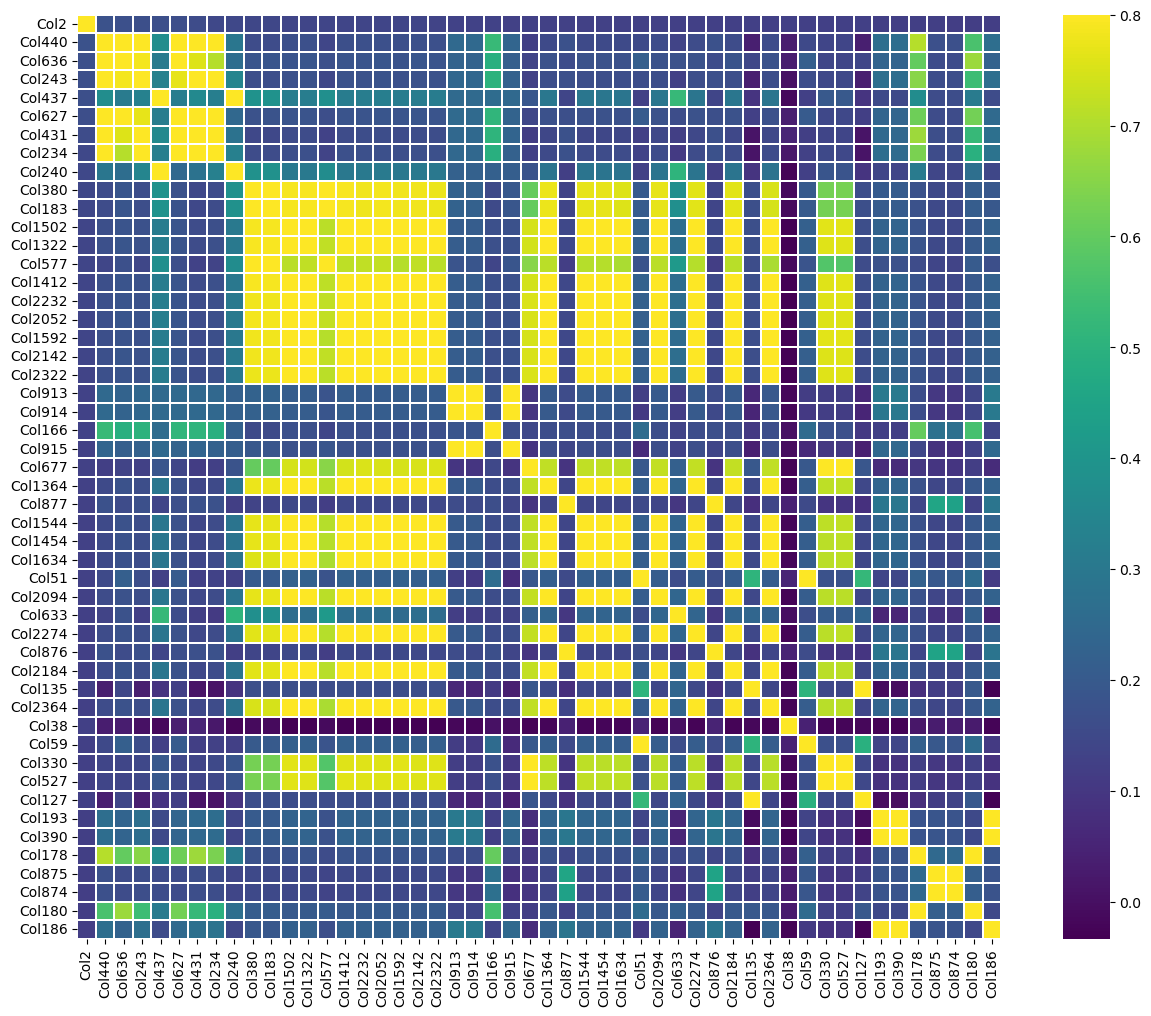

In [7]:
cm = train_df.loc[:,cols].corr()
f,ax = plt.subplots(figsize = (16,12))
col_x = list(set(cols) - set([target]))
X,Y = train_df.loc[:,col_x] ,train_df.loc[:,target]
replace_null(X,col_x)
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=False,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

In [9]:
def generate_accuracy_and_heatmap(model, x, y):
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    pass

In [10]:
print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(Y.shape))
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X, Y)
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, the shape of train_X: (17521, 49)
Before OverSampling, the shape of train_y: (17521,) 

After OverSampling, the shape of train_X: (31520, 49)
After OverSampling, the shape of train_y: (31520,) 

After OverSampling, counts of label '1': 15760
After OverSampling, counts of label '0': 15760


In [11]:
clf_lr = LogisticRegression()
lr_baseline_model = clf_lr.fit(X, Y)
generate_accuracy_and_heatmap(lr_baseline_model, X, Y)
print(pd.crosstab(clf_lr.predict(X),Y,rownames=['Predicted'], colnames=['Actual']))

Accuracy is:  0.8982364020318475
F1 score is:  0.08891159938681654


Actual         0     1
Predicted             
0          15651  1674
1            109    87


In [12]:
model = XGBClassifier(learning_rate=1,n_jobs=4)
model.fit(X, Y)
y_pred = model.predict(X)
predictions = [round(value) for value in Y]
pd.crosstab(y_pred,Y,rownames=['Predicted'], colnames=['Actual'])
generate_accuracy_and_heatmap(model, X, Y)
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'class_weight': [{0: x, 1: 1.0-x} for x in weights]},
    scoring='f1',
    cv=5
)

Accuracy is:  0.9942354888419611
F1 score is:  0.9706309973829601




Best parameters : {'class_weight': {0: 0.14473684210526316, 1: 0.8552631578947368}}
LogisticRegression(class_weight={0: 0.14473684210526316, 1: 0.8552631578947368})


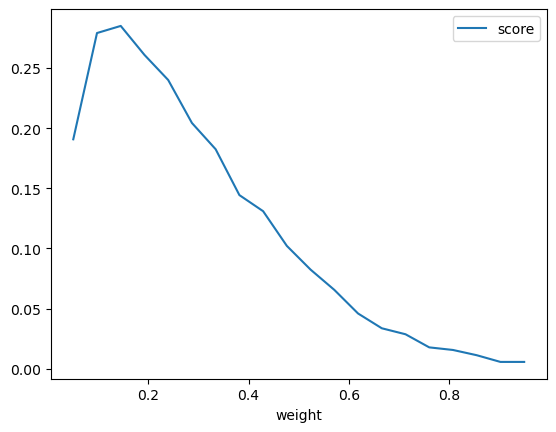

In [13]:
grid_result = gsc.fit(X, Y)
print("Best parameters : %s" % grid_result.best_params_)
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],'weight': weights })
data_out.plot(x='weight')
clf = LogisticRegression(**grid_result.best_params_).fit(X, Y)
print(clf)
y1 = clf.predict(X)

In [23]:
# Constructing a Confusion matrix
print(pd.crosstab(y1,Y,rownames=['Predicted'], colnames=['Actual']))
test_df.loc[:,col_x] = test_df.loc[:,col_x].fillna(method='ffill')
test_df.loc[:,col_x].isna().sum().sort_values(ascending=False)
sample = pd.read_csv("Sample_submission.csv")
y_test = model.predict(test_df.loc[:,col_x])
print(sum(y_test))
sample.drop(index=sample.index,inplace=True)
sample['Col1'] = test_df.iloc[:,0]
sample['Col2'] = y_test
sample.to_csv('out.csv',index=False)
sample=sample.drop(['column1','column2'],axis=1)
print("The sample view of final Targeted values is:\n",sample.sample(20))
print("Total no of rows and columns in the final targeted file is:\n", sample.shape)

Actual         0     1
Predicted             
0          13482  1091
1           2278   670
1036
The sample view of final Targeted values is:
            Col1  Col2
19731  OLVBV1QJ     0
14559  O1WDGO5E     0
10600  O9MUI81G     0
245    7SV66MKG     0
6810   7SGK585Z     0
16531  O15IO55E     0
18198  O1HOVS1D     0
2990   O10DVYXR     0
19964  OLLKLB4G     0
19222  O1EOQ819     0
6790   7S0RLOS5     0
12112  O75H55QW     0
15665  O1GKUS5Z     0
1930   O7LRCCZY     0
6246   9NMH5YQZ     0
12555  O7HH6O4Y     0
3939   O1HDUOYR     0
17558  O1MUU0ZG     0
6394   YL0OVO4E     0
13710  O1VUV0QY     0
Total no of rows and columns in the final targeted file is:
 (20442, 2)
